In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

ImportError: dlopen(/Users/nageshjadhav/miniforge3/envs/nj/lib/python3.9/site-packages/tensorflow/python/platform/_pywrap_cpu_feature_guard.so, 0x0002): Library not loaded: @rpath/libtensorflow_cc.2.dylib
  Referenced from: <61892E90-739E-3EBB-BD19-B9CEF77A59CA> /Users/nageshjadhav/miniforge3/envs/nj/lib/python3.9/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so
  Reason: tried: '/Users/nageshjadhav/miniforge3/envs/nj/lib/python3.9/site-packages/tensorflow/python/../../_solib_darwin_arm64/libtensorflow_cc.2.dylib' (no such file), '/Users/nageshjadhav/miniforge3/envs/nj/lib/python3.9/site-packages/tensorflow/python/../../_solib_darwin_arm64/_U_S_Stensorflow_Spython_C_Upywrap_Utensorflow_Uinternal.so_Ucclib___Utensorflow/libtensorflow_cc.2.dylib' (no such file), '/Users/nageshjadhav/miniforge3/envs/nj/lib/python3.9/site-packages/tensorflow/python/libtensorflow_cc.2.dylib' (no such file), '/Users/nageshjadhav/miniforge3/envs/nj/lib/python3.9/site-packages/tensorflow/python/../libtensorflow_cc.2.dylib' (no such file), '/Users/nageshjadhav/miniforge3/envs/nj/lib/python3.9/site-packages/tensorflow/python/platform/../../../_solib_darwin_arm64/_U_S_Stensorflow_Clibtensorflow_Uframework_Uimport_Ulib___Utensorflow/libtensorflow_cc.2.dylib' (no such file), '/Users/nageshjadhav/miniforge3/envs/nj/lib/python3.9/site-packages/tensorflow/python/platform/../../../_solib_darwin_arm64/_U_S_Stensorflow_Spython_C_Upywrap_Utensorflow_Uinternal_Umacos___Utensorflow_Spython/libtensorflow_cc.2.dylib' (no such file), '/Users/nageshjadhav/miniforge3/envs/nj/lib/python3.9/site-packages/tensorflow/python/platform/libtensorflow_cc.2.dylib' (no such file), '/Users/nageshjadhav/miniforge3/envs/nj/lib/python3.9/site-packages/tensorflow/python/platform/../libtensorflow_cc.2.dylib' (no such file), '/Users/nageshjadhav/miniforge3/envs/nj/lib/python3.9/site-packages/tensorflow/python/platform/../../libtensorflow_cc.2.dylib' (no such file), '/Users/nageshjadhav/miniforge3/envs/nj/lib/python3.9/site-packages/tensorflow/python/platform/../../../_solib_darwin_arm64/_U_S_Stensorflow_Clibtensorflow_Uframework_Uimport_Ulib___Utensorflow/libtensorflow_cc.2.dylib' (no such file), '/Users/nageshjadhav/miniforge3/envs/nj/lib/python3.9/site-packages/tensorflow/python/platform/../../../_solib_darwin_arm64/_U_S_Stensorflow_Spython_C_Upywrap_Utensorflow_Uinternal_Umacos___Utensorflow_Spython/libtensorflow_cc.2.dylib' (no such file), '/Users/nageshjadhav/miniforge3/envs/nj/lib/python3.9/site-packages/tensorflow/python/platform/libtensorflow_cc.2.dylib' (no such file), '/Users/nageshjadhav/miniforge3/envs/nj/lib/python3.9/site-packages/tensorflow/python/platform/../libtensorflow_cc.2.dylib' (no such file), '/Users/nageshjadhav/miniforge3/envs/nj/lib/python3.9/site-packages/tensorflow/python/platform/../../libtensorflow_cc.2.dylib' (no such file), '/Users/nageshjadhav/miniforge3/envs/nj/bin/../lib/libtensorflow_cc.2.dylib' (no such file), '/Users/nageshjadhav/miniforge3/envs/nj/bin/../lib/libtensorflow_cc.2.dylib' (no such file), '/usr/local/lib/libtensorflow_cc.2.dylib' (no such file), '/usr/lib/libtensorflow_cc.2.dylib' (no such file, not in dyld cache)

In [9]:

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [10]:
# Add Gaussian noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the values to be in the [0, 1] range
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [11]:
# Define the denoising autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [12]:
# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the denoising autoencoder
autoencoder.fit(x_train_noisy, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))

# After training, you can use the autoencoder's encoder part to get encoded representations of data.
encoder = Model(input_img, encoded)

# You can also use the autoencoder to denoise images by passing noisy images through it.
denoised_images = autoencoder.predict(x_test_noisy)

Epoch 1/50


loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x256x1x784xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x256x1x784xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerform

231/235 [============================>.] - ETA: 0s - loss: 0.1836

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x96x1x784xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x96x1x784xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerforman

235/235 [==============================] - ETA: 0s - loss: 0.1829

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x256x1x784xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x256x1x784xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerform

235/235 [==============================] - 7s 22ms/step - loss: 0.1829 - val_loss: 0.1287
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1213 - val_loss: 0.1153
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1132 - val_loss: 0.1112
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1099 - val_loss: 0.1089
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1077 - val_loss: 0.1078
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1060 - val_loss: 0.1063
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1045 - val_loss: 0.1054
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1032 - val_loss: 0.1045
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1021 - val_loss: 0.1041
Epoch 10/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1012 - val_loss: 0.1035


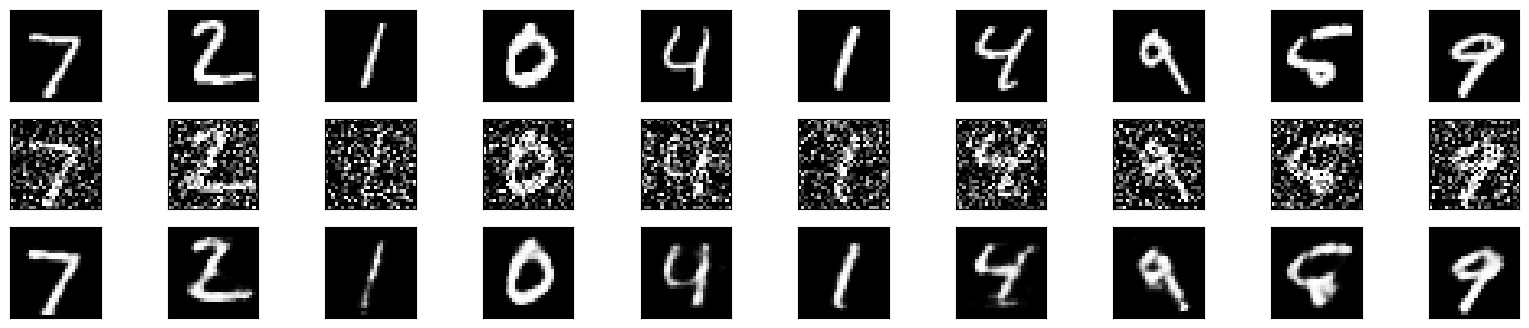

In [14]:
# You can visualize the original, noisy, and denoised images to see the results.
import matplotlib.pyplot as plt

n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original Images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy Images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Denoised Images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()